<a href="https://colab.research.google.com/github/SurajGusain0007/Portfolio_Project/blob/main/Analysis_The_Movie_Streamng_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Analysis The Movie Streaming Services

**Reading dataset**

In [3]:
dataset=pd.read_csv("moviestreams.csv")
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


**Check rows and columns**

In [4]:
dataset.shape

(16744, 17)

**Check columns**

In [5]:
col=dataset.columns.tolist()
col

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

**Drop Unnecessary column**

In [6]:
dataset.drop(['Unnamed: 0','ID'],axis=1,inplace=True)


**Check Again Column after drop**

In [7]:
col=dataset.columns.tolist()
col

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

**Check for missing  values Python recognize null values as Nan**

In [8]:
dataset.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

**Information of the dataset**

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


**Lets Remove the '+' Sign attached values in Age column**

In [10]:
age_map={'18+':18,'7+':7,'13+':13,'16+':16,'All':0}
dataset['Agecopy']=dataset['Age'].map(age_map)
dataset['Agecopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: Agecopy, Length: 16744, dtype: float64

**Lets remove the %sign attached to the vlues in Rotten Tomatoes column**

In [11]:
dataset['New_Rotten_Tomatoes']=dataset['Rotten Tomatoes'].str.replace('%',"")
dataset['New_Rotten_Tomatoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: object

**Change the datatype of Rotten_tomatoes
First convert nonnumeric values (like empty strings) to NaNs and then if use pandas it is possible convert column to integers:
Then for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:**

In [12]:
dataset.New_Rotten_Tomatoes=pd.to_numeric(dataset.New_Rotten_Tomatoes,errors='coerce').astype('Int64')


In [13]:
dataset.New_Rotten_Tomatoes.dtypes

Int64Dtype()

**Stastics Information about the dataset**

In [14]:
dataset.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,Agecopy,New_Rotten_Tomatoes
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000,6511.000000,5158.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447,14.467977,65.428461
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222,4.439923,26.614496
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,7.000000,2.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000,13.000000,44.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000,18.000000,71.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000,18.000000,88.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000,18.000000,100.000000


**Show Visulization 
What is the number of movies of age group**

In [15]:
df=dataset['Age'].value_counts()

In [16]:
df.index

Index(['18+', '7+', '13+', 'all', '16+'], dtype='object')

In [17]:
df.values

array([3474, 1462, 1255,  843,  320])

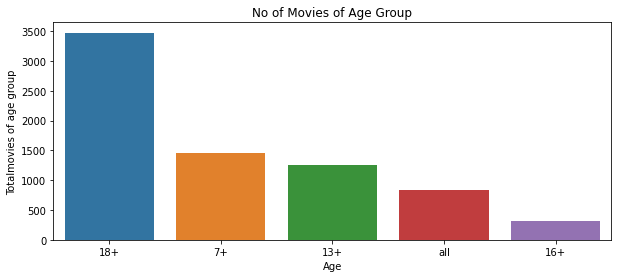

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x=df.index,y=df.values)
plt.title("No of Movies of Age Group")
plt.xlabel("Age")
plt.ylabel('Totalmovies of age group')
plt.show()

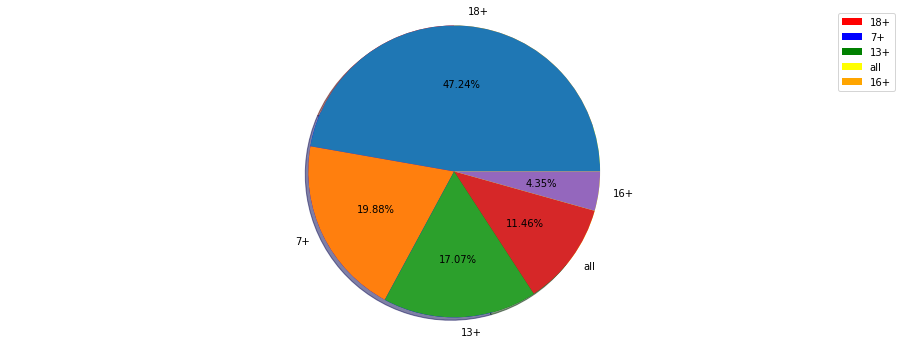

In [19]:

plt.figure(figsize=(16,6))

labels = ['18+', '7+', '13+', 'all','16+']
sizes = [23, 45, 12, 20,25]
colors = ['red', 'blue', 'green', 'yellow','orange']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")

plt.pie(x=df.values,autopct='%1.2f%%',labels=labels)
plt.axis("equal")
plt.show()

**Show Visulization Top 10 languages in streaming services**

In [20]:
lan=dataset['Language'].value_counts().head(10)
lan

English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Name: Language, dtype: int64

In [21]:
lan.index

Index(['English', 'Hindi', 'English,Spanish', 'Spanish', 'English,French',
       'Italian', 'French', 'Japanese', 'Mandarin', 'Tamil'],
      dtype='object')

In [22]:
lan.values

array([10955,   503,   276,   267,   174,   166,   163,   155,   151,
          93])

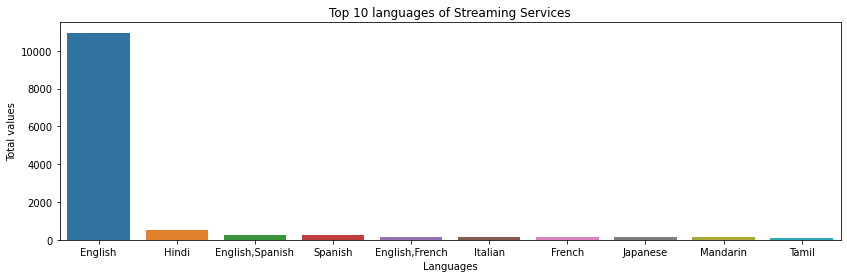

In [23]:
plt.figure(figsize=(14,4))
sns.barplot(x=lan.index,y=lan.values)
plt.title("Top 10 languages of Streaming Services")
plt.xlabel("Languages")
plt.ylabel('Total values')
plt.show()

**Number of Age groups specific in Netflix**

In [24]:
df_netflix=dataset[dataset['Netflix']==1]

In [25]:
df1=df_netflix['Age'].value_counts()

In [26]:
df1.index

Index(['18+', '13+', '7+', 'all', '16+'], dtype='object')

In [27]:
df1.values

array([752, 383, 323, 130,  89])

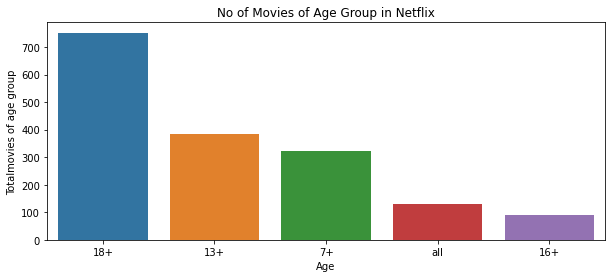

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(x=df1.index,y=df1.values)
plt.title("No of Movies of Age Group in Netflix")
plt.xlabel("Age")
plt.ylabel('Totalmovies of age group')
plt.show()

**Number of Age groups specific in Amazon**

In [29]:
df_amazon=dataset[dataset['Prime Video']==1]


In [30]:
df1=df_amazon['Age'].value_counts()
df1

18+    2612
7+      916
13+     819
all     406
16+     226
Name: Age, dtype: int64

In [31]:
df1.index

Index(['18+', '7+', '13+', 'all', '16+'], dtype='object')

In [32]:
df1.values

array([2612,  916,  819,  406,  226])

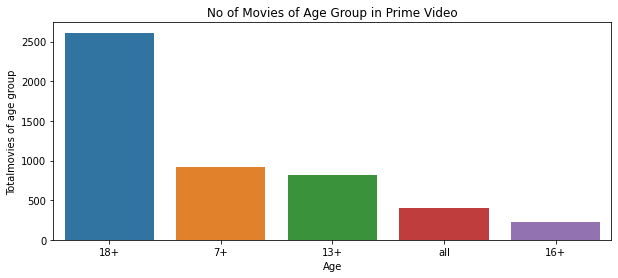

In [33]:
plt.figure(figsize=(10,4))
sns.barplot(x=df1.index,y=df1.values)
plt.title("No of Movies of Age Group in Prime Video")
plt.xlabel("Age")
plt.ylabel('Totalmovies of age group')
plt.show()

**No of Age groups in Hulu**

In [34]:
df_hulu=dataset[dataset['Hulu']==1]


In [35]:
df1=df_hulu['Age'].value_counts()

In [36]:
df1.index

Index(['18+', '13+', '7+', 'all', '16+'], dtype='object')

In [37]:
df1.values

array([290, 119, 109,  55,  17])

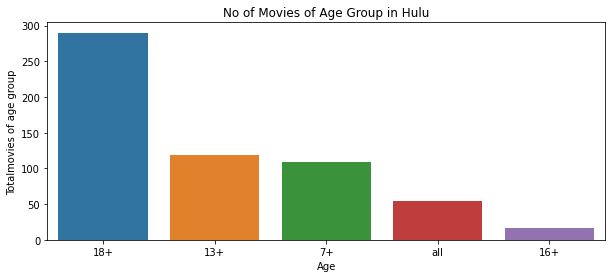

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x=df1.index,y=df1.values)
plt.title("No of Movies of Age Group in Hulu")
plt.xlabel("Age")
plt.ylabel('Totalmovies of age group')
plt.show()

**No of Age Groups in Disney+**

In [39]:
df_disney=dataset[dataset['Disney+']==1]

In [40]:
df1=df_disney['Age'].value_counts()
df1

all    277
7+     179
13+     40
18+      3
16+      1
Name: Age, dtype: int64

In [41]:
df1.index

Index(['all', '7+', '13+', '18+', '16+'], dtype='object')

In [42]:
df1.values

array([277, 179,  40,   3,   1])

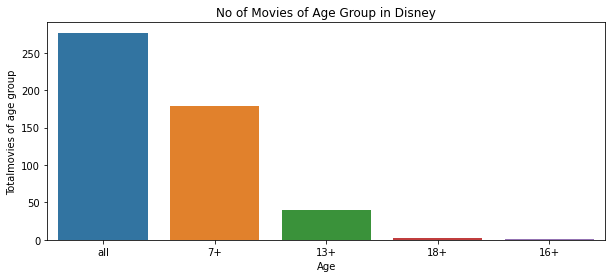

In [43]:
plt.figure(figsize=(10,4))
sns.barplot(x=df1.index,y=df1.values)
plt.title("No of Movies of Age Group in Disney")
plt.xlabel("Age")
plt.ylabel('Totalmovies of age group')
plt.show()

**Overall Rotten Tomato Ratings**

In [44]:
df=dataset['New_Rotten_Tomatoes'].value_counts()
df

100    407
80     162
50     136
83     131
67     126
      ... 
28      10
7       10
4        9
3        4
2        4
Name: New_Rotten_Tomatoes, Length: 99, dtype: Int64

In [45]:
df.index


Int64Index([100,  80,  50,  83,  67,  88,  86,  40,  92,  75,  91,  89,  60,
             90,  57,  33,  20,  85,  71,  94,  93,  96,  95,  82,  87,  43,
             81,  63,  78,  38,  73,  29,  77,  97,  64,  84,  17,  70,  76,
             79,  69,  44,  56,  25,  22,  62,  42,  45,  98,  74,  55,  72,
             14,  68,  65,  13,  53,  58,  47,  27,  36,  30,  61,  54,  41,
             18,  59,  11,  99,  52,  19,  32,  21,  39,  16,  10,  37,  46,
             66,   8,   9,  48,  24,  26,  23,  35,  31,  51,  34,  15,  49,
             12,   6,   5,  28,   7,   4,   3,   2],
           dtype='int64')

In [46]:
df.values


<IntegerArray>
[407, 162, 136, 131, 126, 121, 116, 106, 106, 100, 100,  98,  98,  91,  84,
  82,  79,  78,  78,  76,  73,  73,  72,  71,  68,  68,  67,  66,  65,  64,
  64,  64,  62,  61,  59,  58,  57,  55,  53,  48,  46,  45,  44,  44,  42,
  41,  41,  41,  41,  38,  37,  36,  36,  36,  35,  34,  33,  33,  33,  33,
  31,  30,  30,  30,  30,  29,  29,  27,  26,  26,  26,  24,  21,  21,  21,
  20,  20,  20,  20,  19,  19,  19,  18,  17,  17,  16,  16,  14,  14,  14,
  13,  11,  11,  10,  10,  10,   9,   4,   4]
Length: 99, dtype: Int64

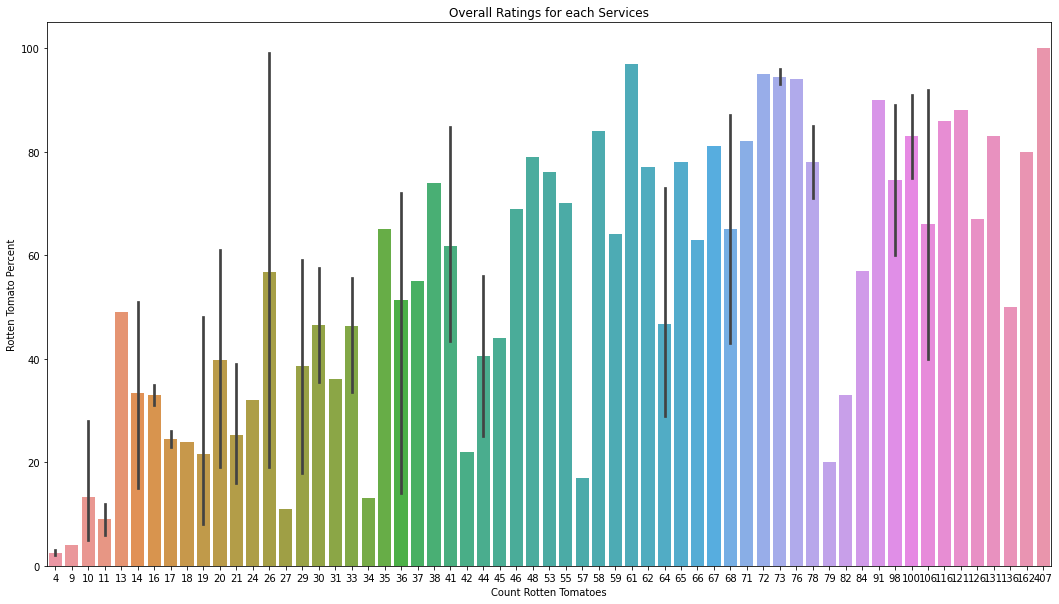

In [47]:
plt.figure(figsize=(18,10))
sns.barplot(y=df.index,x=df.values)
plt.title("Overall Ratings for each Services")
plt.ylabel("Rotten Tomato Percent")
plt.xlabel('Count Rotten Tomatoes')
plt.show()

**Rotten Tomato for each Service and find highest rotten for each service**

In [48]:
rt_score=pd.DataFrame({'Streaming_Services':['Netflix','Hulu','Disney+','Prime Video'],
'Rotten_Tomato_Score':[df_netflix['Rotten Tomatoes'].value_counts()[0],
df_hulu['Rotten Tomatoes'].value_counts()[0],
df_disney['Rotten Tomatoes'].value_counts()[0],
df_amazon['Rotten Tomatoes'].value_counts()[0]
]})

rt=rt_score.sort_values(ascending=False,by='Rotten_Tomato_Score')
rt

,Streaming_Services,Rotten_Tomato_Score
3,Prime Video,257
0,Netflix,130
2,Disney+,19
1,Hulu,18


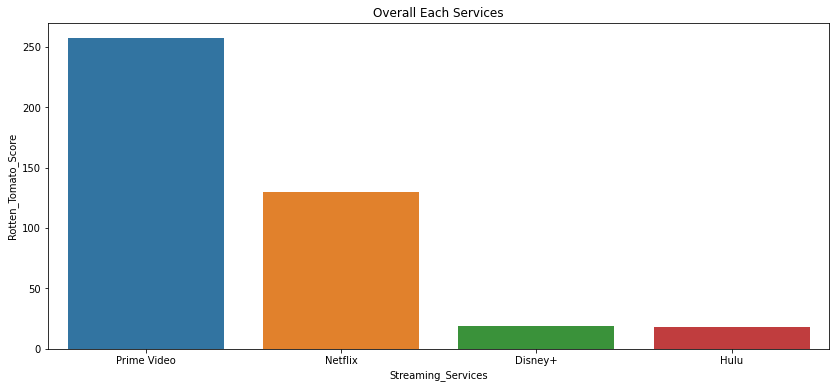

In [49]:
plt.figure(figsize=(14,6))
sns.barplot(x='Streaming_Services',y='Rotten_Tomato_Score',data=rt)
plt.title("Overall Each Services")
plt.show()

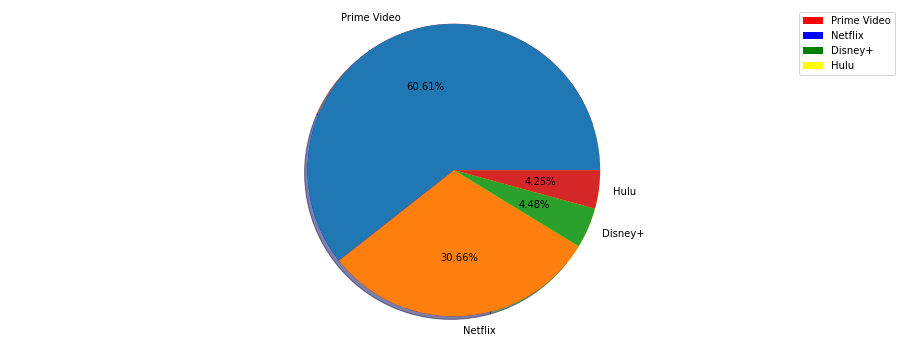

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))

labels = ['Prime Video', 'Netflix', 'Disney+', 'Hulu']
sizes = [23, 45, 12, 20,25]
colors = ['red', 'blue', 'green', 'yellow']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.pie(x='Rotten_Tomato_Score',autopct='%1.2f%%',data=rt,labels=labels)

plt.axis("equal")
plt.show()

**Top 10 Highest Genres Movie over all streaming services**

In [51]:
genre=dataset.groupby('Genres').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'})
genre_df=genre.head(10)  
genre_df                            

,Genres,Count
0,Drama,1341
1,Documentary,1229
2,Comedy,1040
3,"Comedy,Drama",446
4,Horror,436
5,"Drama,Romance",397
6,"Comedy,Drama,Romance",333
7,"Horror,Thriller",297
8,"Comedy,Romance",289
9,"Drama,Thriller",222


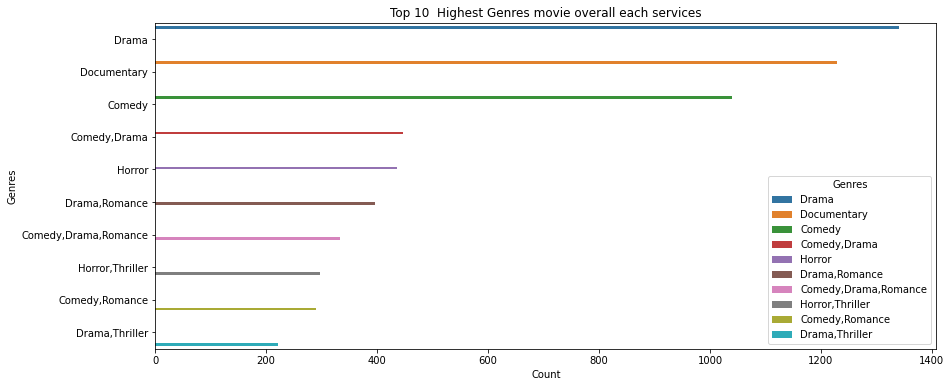

In [52]:
plt.figure(figsize=(14,6))
sns.barplot(x='Count',y='Genres',data=genre_df,hue='Genres')
plt.title("Top 10  Highest Genres movie overall each services")
plt.show()


**Runtime of  Movies**

In [53]:
runtime_duration=pd.DataFrame(dict(dataset['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(),
                              columns=['Runtime','Count'])
runtime_duration

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8


**Top 10 directors**

In [54]:
dataset['Directors']=dataset['Directors'].astype(str)
new_data=dataset[dataset['Directors'] !=np.nan]
directors_count=dict()
direct=list(new_data['Directors'])
for xdir in direct:
  curr_dirc= xdir.split(',')
  for xd in curr_dirc:
    if xd in directors_count.keys():
      directors_count[xd]=directors_count[xd]+1
    else:
      directors_count[xd]=1


In [55]:

mov=pd.DataFrame(directors_count.items(),columns=['Director','Count'])

mov=mov.sort_values(ascending=False,by='Count')
mov=mov.drop(56,axis=0)
df=mov.head(10)
df

,Director,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


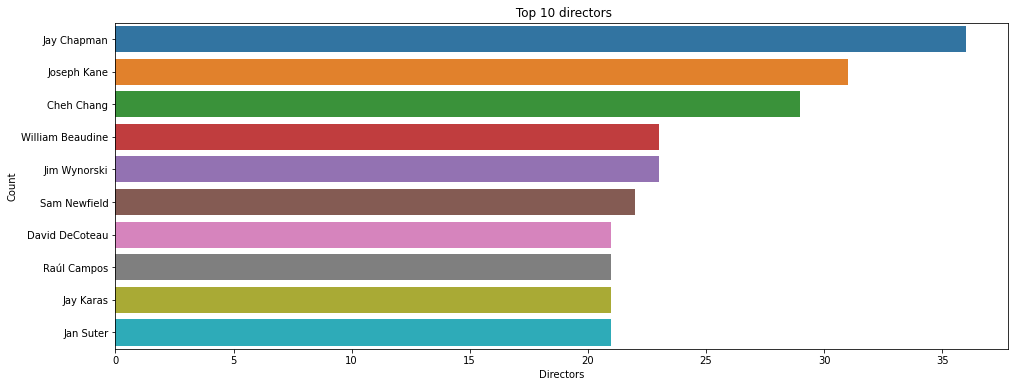

In [57]:
plt.figure(figsize=(16,6))
sns.barplot(y='Director',x='Count',data=df)
plt.title(" Top 10 directors")
plt.ylabel("Count")
plt.xlabel('Directors')
plt.show()

**Find out Jay chapman movies**

In [58]:
dataset[dataset['Directors']=='Jay Chapman'][['Directors','Title','Genres','Runtime']]

,Directors,Title,Genres,Runtime
1014,Jay Chapman,Jim Gaffigan: Obsessed,"Documentary,Comedy",60.0
1234,Jay Chapman,Iliza Shlesinger: War Paint,Comedy,75.0
1417,Jay Chapman,Tom Segura: Completely Normal,"Documentary,Comedy",74.0
2211,Jay Chapman,Todd Barry: Spicy Honey,Comedy,60.0
2331,Jay Chapman,Craig Ferguson: Tickle Fight,Comedy,66.0
2393,Jay Chapman,Colin Quinn: Unconstitutional,Comedy,55.0
2447,Jay Chapman,Lucas Brothers: On Drugs,Comedy,50.0
2523,Jay Chapman,D.L. Hughley: Contrarian,Comedy,58.0
2636,Jay Chapman,D.L. Hughley: Clear,Comedy,60.0
2721,Jay Chapman,Moshe Kasher: Live in Oakland,Comedy,61.0


**Exploring Genres**

In [63]:
genre_=dict(dataset['Genres'].value_counts())
genre_count=dict()
for g ,count in genre_.items():
 g= g.split(',')
 for xd in g:
   if xd in genre_count.keys():
     genre_count[xd]=genre_count[xd]+1
   else:
      genre_count[xd]=1


In [65]:

genres_=pd.DataFrame(genre_count.items(),columns=['Genre','Count'])

genres_=genres_.sort_values(ascending=False,by='Count')
df1=genres_.head(10)
df1

,Genre,Count
0,Drama,868
2,Comedy,654
19,Adventure,560
6,Action,553
5,Thriller,467
11,Family,426
4,Romance,420
20,Fantasy,371
7,Crime,347
9,Mystery,318


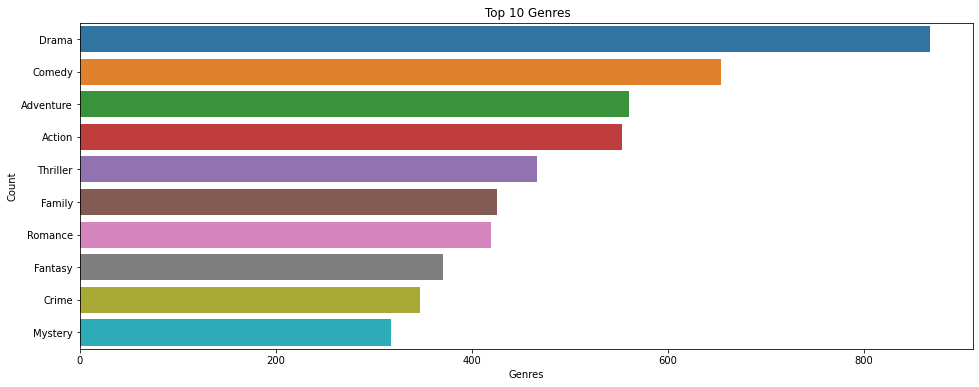

In [68]:
plt.figure(figsize=(16,6))
sns.barplot(y='Genre',x='Count',data=df1)
plt.title(" Top 10 Genres")
plt.ylabel("Count")
plt.xlabel('Genres')
plt.show()

**What are the top movies on each platform**

**On Netflix**

In [76]:
top_netflix=df_netflix[df_netflix['IMDb']>8.5]
top_df=top_netflix[['Title','IMDb']].sort_values(ascending=False,by='IMDb')
top_df

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


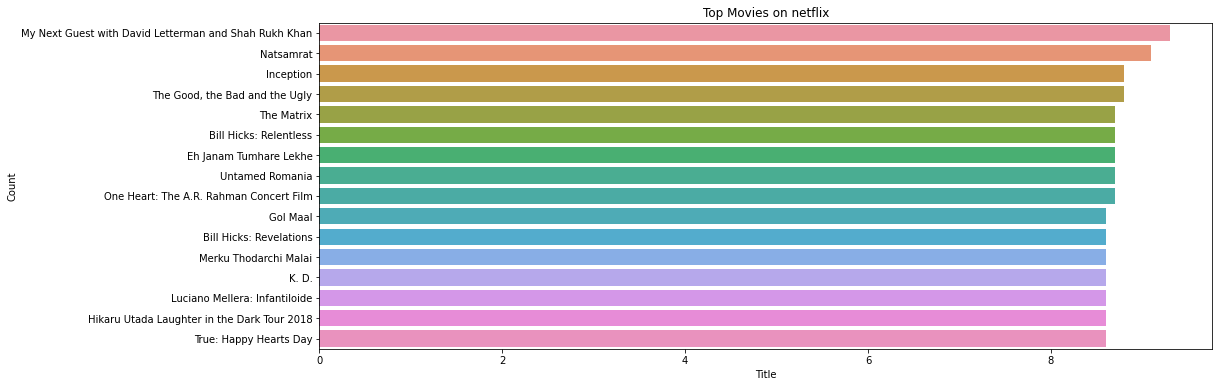

In [77]:
plt.figure(figsize=(16,6))
sns.barplot(y='Title',x='IMDb',data=top_df)
plt.title("Top Movies on netflix")
plt.ylabel("Count")
plt.xlabel('Title')
plt.show()

**on hulu**

In [78]:
top_hulu=df_hulu[df_hulu['IMDb']>8.5]
top_df1=top_hulu[['Title','IMDb']].sort_values(ascending=False,by='IMDb')
top_df1

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


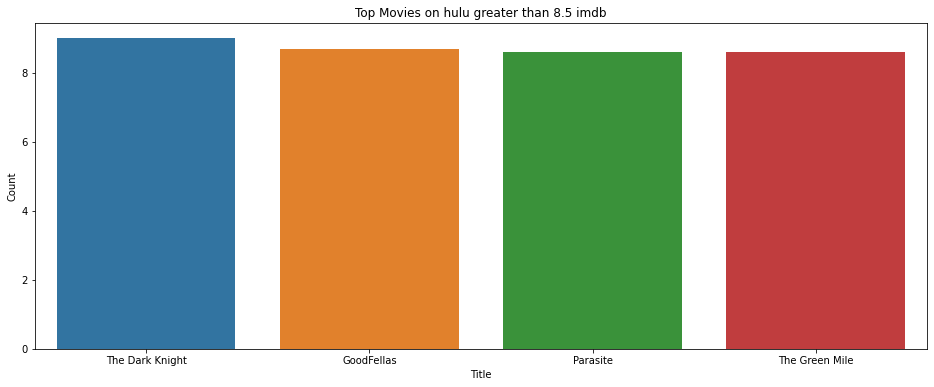

In [80]:
plt.figure(figsize=(16,6))
sns.barplot(x='Title',y='IMDb',data=top_df1)
plt.title("Top Movies on hulu greater than 8.5 imdb")
plt.ylabel("Count")
plt.xlabel('Title')
plt.show()

**On Amazon Prime Video**

In [84]:
top_amazon=df_amazon[df_amazon['IMDb']>8.8]
top_df2=top_amazon[['Title','IMDb']].sort_values(ascending=False,by='IMDb')
top_df2

,Title,IMDb
6566,Square One,9.3
6837,Steven Banks: Home Entertainment Center,9.3
7220,"Down, But Not Out!",9.3
7426,Bounty,9.3
5110,Love on a Leash,9.3
7491,Finding Family,9.1
8458,Where's Daddy?,9.1
7002,Escape from Firebase Kate,9.0
7267,A Dog Named Gucci,9.0
8359,Stronger Than Bullets,8.9


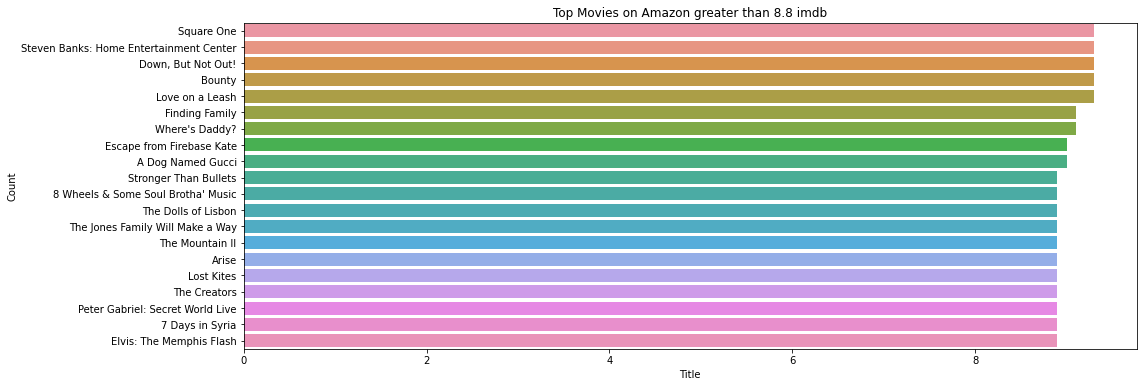

In [85]:
plt.figure(figsize=(16,6))
sns.barplot(y='Title',x='IMDb',data=top_df2)
plt.title("Top Movies on Amazon greater than 8.8 imdb")
plt.ylabel("Count")
plt.xlabel('Title')
plt.show()

**On Disney+**

In [87]:
top_disney=df_disney[df_disney['IMDb']>8.5]
top_df3=top_disney[['Title','IMDb']].sort_values(ascending=False,by='IMDb')
top_df3

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


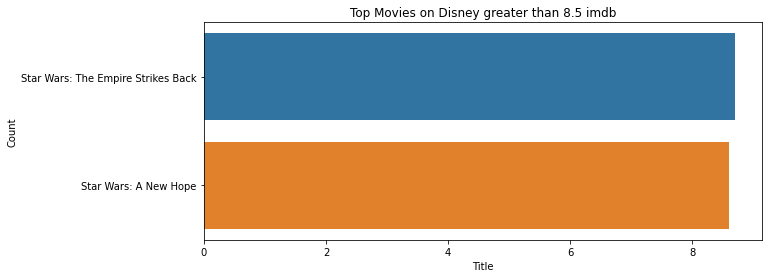

In [89]:
plt.figure(figsize=(10,4))
sns.barplot(y='Title',x='IMDb',data=top_df3)
plt.title("Top Movies on Disney greater than 8.5 imdb")
plt.ylabel("Count")
plt.xlabel('Title')
plt.show()